# A/B Test for Different Promotional Campaigns in the Fast Food Industry

### Background on the importance of promotional campaigns
#### Working in the Consumer Packaged Goods industry, I understand that promotional campaigns and trade spending are critical to driving competitive advantage and generating a lift in sales. Since these promotional campaigns require substantial funding and effort, it is imperative to run them at the right time, place, and price point. Especially for new product releases, innovation funding is key to understanding if new products will become part of the permanent portfolio. 

#### In this project, I will be using this <a href="https://www.kaggle.com/datasets/chebotinaa/fast-food-marketing-campaign-ab-test">fast food campaign data</a> to run an A/B test and determine which of the three promotional campaign drives the most sales for a new menu item. 

# 1. Prerequisites & EDA

In [1]:
# Import required libraries
import pandas as pd
import seaborn as sns

# Import dataset
df_promos = pd.read_csv("WA_Marketing-Campaign.csv", sep=",")
df_promos.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


Now that the dataset is read in, let's answer some questions about the data so we can design the best A/B experiment. Specifically, we want to understand the data so that we can choose the metric that best measures promotional success and use that as our criteria for the A/B test.

First, what does a sample population look like and what are the customer segments for the target product?

In [2]:
df_promos.groupby(['MarketSize'])['MarketSize'].count()

MarketSize
Large     168
Medium    320
Small      60
Name: MarketSize, dtype: int64

*Market Size* 

Here we can see that this fast food company has stores that serve different market sizes: small, medium, and large. Let's assume that the larger the market is, the greater the foot traffic. Therefore, larger stores will naturally have larger sales. For our A/B testing, this means that we cannot directly compare the SalesInThousands metric because uplift in one store is not comparable to another. Instead, we can run the tests for each of the different clusters (small, medium, and large).

<AxesSubplot:title={'center':'Store Maturity'}, xlabel='AgeOfStore'>

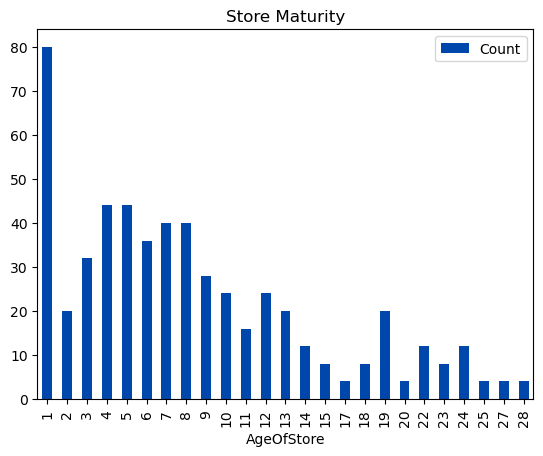

In [3]:
df_store_maturity = df_promos.groupby('AgeOfStore').size().reset_index(name="Count")

df_store_maturity.plot.bar(x='AgeOfStore', y='Count', color='#0047AB', title='Store Maturity')

*Store Maturity* 

In this graph we can see how long each store has been in business. Most stores have been in business less than 10 years. The only outlier is that there are 80 stores which have been in business for only 1 year. This could mean the company is expanding, which is good for them. However, this could create noise in our analysis because new stores may just attract customers because of the novelty of being new, not because of the new product. 

We need to see what influence this has. Therefore, in our A/B test, let's run it once including these ~80 stores and once without it. If it is causing too much noise, we will remove these 80 stores from the analysis. 

*Assumptions*

1. Since we didn't collect that data, let's assume the stores are truly randomized and are true representations of store population. 
2. Since we don't know geography, assume all geographies behave similarly. 



Let's create three new data frames. One for large, medium, and small market size.

In [15]:
# Data Frames Separated by Market Size
df_large_market = df_promos.loc[df_promos['MarketSize'] == 'Large']
df_medium_market = df_promos.loc[df_promos['MarketSize'] == 'Medium']
df_small_market = df_promos.loc[df_promos['MarketSize'] == 'Small']


# Data Frames with new stores removed. 
df_lm_without_new_stores = df_large_market[df_large_market.AgeOfStore != 1] 
df_mm_without_new_stores = df_medium_market[df_medium_market.AgeOfStore != 1] 
df_sm_without_new_stores= df_small_market[df_small_market.AgeOfStore != 1] 

Let's see how each promotion performed in each market size.

In [16]:
# Large Market Stores
df_large_market = df_large_market.filter(['SalesInThousands','week','Promotion'], axis=1)
df_large_market = df_large_market.groupby(['week', 'Promotion']).agg({'SalesInThousands':'sum'})

df_lm_without_new_stores = df_lm_without_new_stores.filter(['SalesInThousands','week','Promotion'], axis=1)
df_lm_without_new_stores = df_lm_without_new_stores.groupby(['week', 'Promotion']).agg({'SalesInThousands':'sum'})

# Medium Market Stores
df_medium_market = df_medium_market.filter(['SalesInThousands','week','Promotion'], axis=1)
df_medium_market = df_medium_market.groupby(['week', 'Promotion']).agg({'SalesInThousands':'sum'})

df_mm_without_new_stores = df_mm_without_new_stores.filter(['SalesInThousands','week','Promotion'], axis=1)
df_mm_without_new_stores = df_mm_without_new_stores.groupby(['week', 'Promotion']).agg({'SalesInThousands':'sum'})

# Small Market Stores
df_small_market = df_small_market.filter(['SalesInThousands','week','Promotion'], axis=1)
df_small_market = df_small_market.groupby(['week', 'Promotion']).agg({'SalesInThousands':'sum'})

df_sm_without_new_stores = df_sm_without_new_stores.filter(['SalesInThousands','week','Promotion'], axis=1)
df_sm_without_new_stores = df_sm_without_new_stores.groupby(['week', 'Promotion']).agg({'SalesInThousands':'sum'})


[Text(0.5, 1.0, 'Large Market Stores Promotion Performance')]

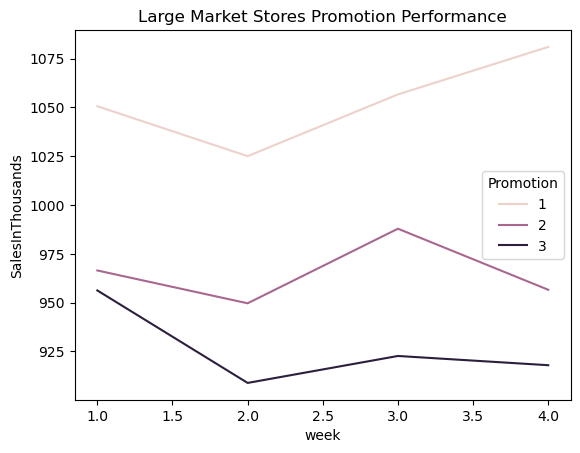

In [18]:
# Plot Results
sns.lineplot(data=df_large_market, x='week', y='SalesInThousands', hue='Promotion').set(title='Large Market Stores Promotion Performance')

[Text(0.5, 1.0, 'Large Market Mature Stores Promotion Performance')]

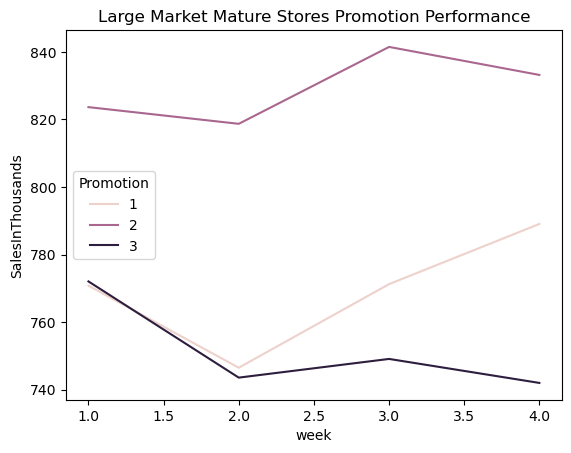

In [19]:
sns.lineplot(data=df_lm_without_new_stores, x='week', y='SalesInThousands', hue='Promotion').set(title='Large Market Mature Stores Promotion Performance')

[Text(0.5, 1.0, 'Medium Market Stores Promotion Performance')]

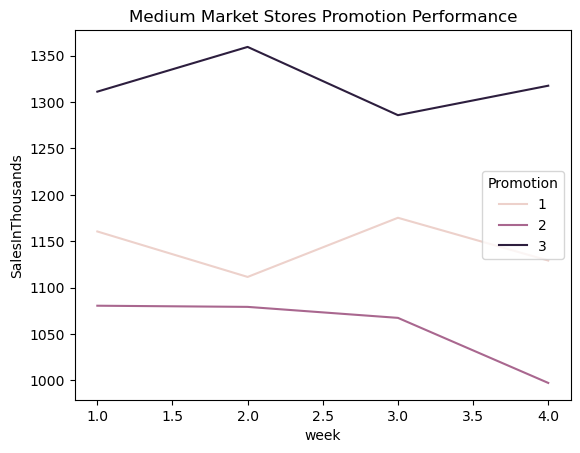

In [8]:
sns.lineplot(data=df_medium_market, x='week', y='SalesInThousands', hue='Promotion').set(title='Medium Market Stores Promotion Performance')

[Text(0.5, 1.0, 'Medium Market Mature Stores Promotion Performance')]

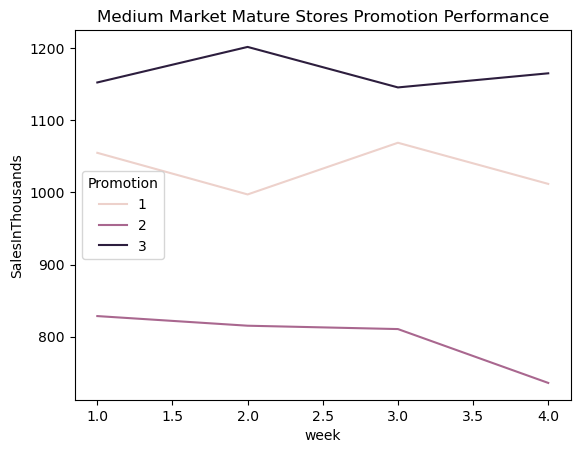

In [22]:
sns.lineplot(data=df_mm_without_new_stores, x='week', y='SalesInThousands', hue='Promotion').set(title='Medium Market Mature Stores Promotion Performance')

[Text(0.5, 1.0, 'Small Market Stores Promotion Performance')]

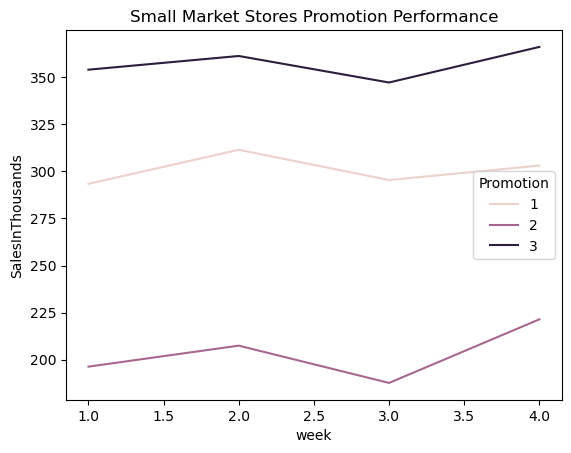

In [9]:
sns.lineplot(data=df_small_market, x='week', y='SalesInThousands', hue='Promotion').set(title='Small Market Stores Promotion Performance')

[Text(0.5, 1.0, 'Small Market Mature Stores Promotion Performance')]

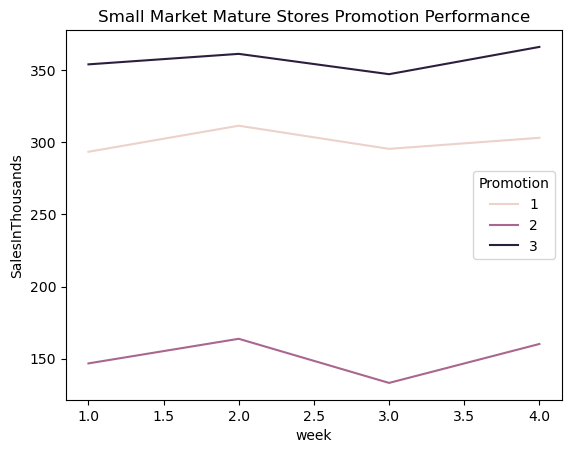

In [23]:
sns.lineplot(data=df_sm_without_new_stores, x='week', y='SalesInThousands', hue='Promotion').set(title='Small Market Mature Stores Promotion Performance')

*Initial Impressions*

Just by looking at these graphs of promotion performance we can see the following insights: 
1.Large stores with more than 1 year of sales sold more of the new product with promotion 2.
2. Large stores with 1 year of sales sold more with promotion 1. 
3. Medium and small stores sold the most new product with promotion 3 (regarless of if store was mature or new). 

Based on this initial analysis it looks like this company should run different promotions for this new product based on store maturity and market size. But let's continue with the experiment to see if this inuition is confirmed. 

# 2. Primary Metric for Sucess

Given that the fast food company is introducing a new product, the metric we should use to measure promotional success is the sales of the new product. 

Posed as a question: <b>Which promotion drove the most sales of the new product? </b>

From the exploratory data analysis we will be mindful of two things. 
1. That stores with different market sizes will have different total sales. 
2. That stores with only 1 year of sales affect only stores with large market size. 

# 3. Experiment Design

<b>Statistical Hypothesis:</b> All promotions drive equal amount of sales. That is, 
$ H_0: p_1 = p_2 = p_3 $

<b> Power Analysis:</b> 

Power is 80%. This means probability of our Type II error is 1-beta, or 20%. This is when we do not detect a significant differenc ein promotions performance even though there is an effect. 

Significance is 5%. This is the probability of Type I error. That we detect a significant different in promotion performance when actually none exists. 

Minimal Detectable Effect is 10% more sales. This is the smallest effect that will guide business decision on which promotion to run nationwide. 

Sample Size: Assume sample sizes are adequate (but in reality sample sizes are note large enough) See <a href="https://www.gigacalculator.com/calculators/power-sample-size-calculator.php">Sample Size Calculator</a>

# 4. Running the Experiment

The reults of the expirment are the dataset itself. Let's assume it was run for correct amount of time and suffered no novelty or maturation affects. 

<b> Two Sample T Test</b>

In [85]:
from scipy.stats import ttest_ind
# Small Stores 

#define samples
group1 = df_promos.loc[(df_promos['MarketSize']=='Small') & (df_promos['Promotion']==3)] 
group2 = df_promos.loc[(df_promos['MarketSize']=='Small') & (df_promos['Promotion']==1)] 

print(ttest_ind(group1['SalesInThousands'], group2['SalesInThousands']))

group1 = df_promos.loc[(df_promos['MarketSize']=='Small') & (df_promos['Promotion']==3)] 
group2 = df_promos.loc[(df_promos['MarketSize']=='Small') & (df_promos['Promotion']==2)] 

print(ttest_ind(group1['SalesInThousands'], group2['SalesInThousands']))


Ttest_indResult(statistic=-0.41385419784316163, pvalue=0.6810867067433423)
Ttest_indResult(statistic=4.919628529158041, pvalue=1.7059958706547655e-05)


For small stores, comparing promotion 3 to promotion 1 did not yeild statistically significant results. 
For small stores, comparing promotion 3 and promotion 2 did yeild statistically significant results, with a p-value of essentially 0. 

In [86]:
# Medium Stores
#define samples
group1 = df_promos.loc[(df_promos['MarketSize']=='Medium') & (df_promos['Promotion']==3)] 
group2 = df_promos.loc[(df_promos['MarketSize']=='Medium') & (df_promos['Promotion']==1)] 

print(ttest_ind(group1['SalesInThousands'], group2['SalesInThousands']))

group1 = df_promos.loc[(df_promos['MarketSize']=='Medium') & (df_promos['Promotion']==3)] 
group2 = df_promos.loc[(df_promos['MarketSize']=='Medium') & (df_promos['Promotion']==2)] 

print(ttest_ind(group1['SalesInThousands'], group2['SalesInThousands']))

Ttest_indResult(statistic=-1.9765860321269122, pvalue=0.04939721833170492)
Ttest_indResult(statistic=5.627926077289622, pvalue=5.4705188612903835e-08)


For medium stores, comparing promotion 3 to promotion 1 & 2 yielded statistically significant results, with a p-value less than .05. 

In [87]:
# Large Stores
#define samples
group1 = df_promos.loc[(df_promos['MarketSize']=='Medium') & (df_promos['Promotion']==1)] 
group2 = df_promos.loc[(df_promos['MarketSize']=='Medium') & (df_promos['Promotion']==2)] 

print(ttest_ind(group1['SalesInThousands'], group2['SalesInThousands']))

group1 = df_promos.loc[(df_promos['MarketSize']=='Medium') & (df_promos['Promotion']==1)] 
group2 = df_promos.loc[(df_promos['MarketSize']=='Medium') & (df_promos['Promotion']==3)] 

print(ttest_ind(group1['SalesInThousands'], group2['SalesInThousands']))

Ttest_indResult(statistic=7.205544411915292, pvalue=1.1261780419231887e-11)
Ttest_indResult(statistic=1.9765860321269122, pvalue=0.04939721833170492)


For large stores, comparing promotion 1 to 2 and 3 yielded statistically significant results, with a p-value less than .05. 

# 5. Conclusion & Recommendation 

Based on our exploratory analysis and the results of the two sample t test, we reccomend that this fast food chain runs promotion 3 in small and medium markets and promotion 1 in large markets. 

However, there are two things we should investigate further if possible. First, the dataset did not give any details on geography. Not all geographies behave the same, so it is possible that this recommendation will miss some nuances. Second, the dataset did not provide any information on the sale of other items. We need to take into account the cannabalization of sales of the existing products as a result of introducing a new product.  